In [25]:
# 使用XGBoost进行训练
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 读取数据
train_data = pd.read_csv('./dataset/combined_df.csv')
labels = train_data["Class"].values

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(train_data.drop("Class", axis=1), labels, test_size=0.2, random_state=42)

# 训练模型
model = xgb.XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8, reg_alpha=1, reg_lambda=1)
model.fit(X_train, y_train)


# 预测测试集
y_pred = model.predict(X_test)


# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# 保存模型
model.save_model('xgboost_model.json')

# 加载模型
# model = xgb.XGBClassifier()
# model.load_model('xgboost_model.json')
# model.load_weights('xgboost_model.h5')



Accuracy: 0.9307692307692308


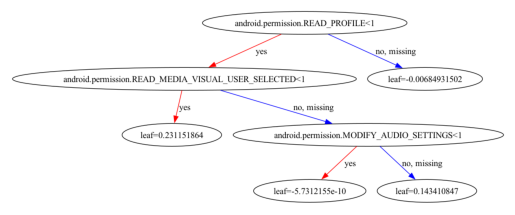

In [31]:

import matplotlib.pyplot as plt

# 假设 model 是一个训练好的 XGBClassifier 或 XGBRegressor 模型
# 假设 X_train 是训练数据的特征列名

xgb.plot_tree(model, num_trees=4, feature_names=X_train.columns)
plt.show()

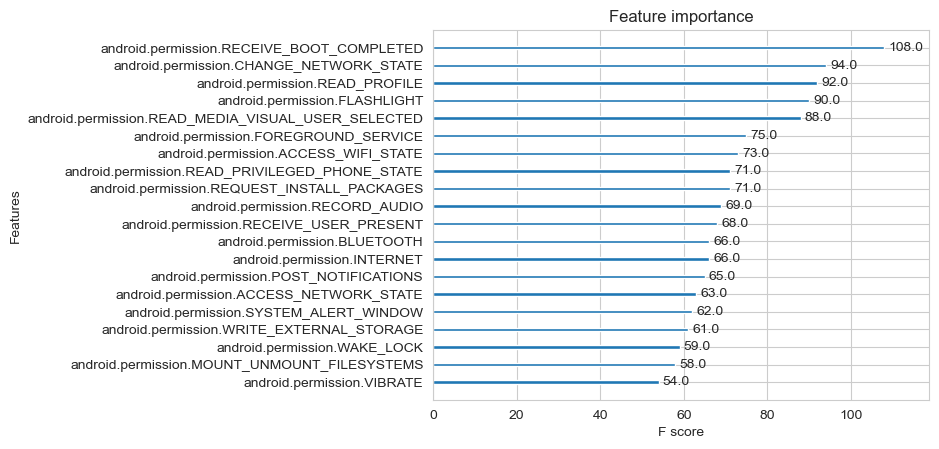

In [27]:

# 绘制特征重要性图，只显示前 20 个重要性最高的特征
xgb.plot_importance(model, max_num_features=20)
plt.show()

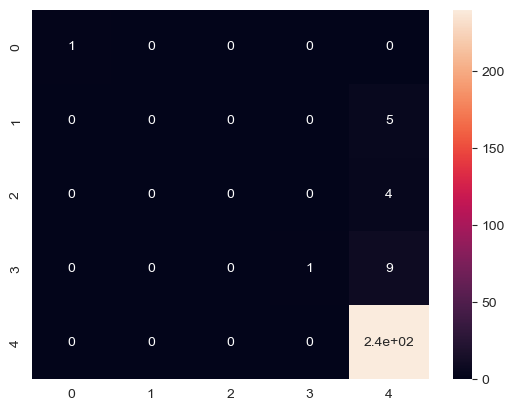

In [28]:

# 混淆矩阵
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm, annot=True)
plt.show()